In [1]:
import torch as th
import matplotlib.pyplot as plt
import numpy as np
import imageio as imgio

from img2img_net import Img2ImgNet
from torchvision.transforms.functional import to_pil_image

In [2]:
IMG_SIZSE = (512, 512)
PATCH_SIZE = (128, 128)
ENCODING_DIM = 32
SAMPLES_TO_GENERATE = 100
SESSION_NUM = 0

In [3]:
from torchvision.transforms.v2 import Resize
tf = Resize(IMG_SIZSE)

In [4]:
plt.style.use("dark_background")

In [5]:
model = Img2ImgNet(
        img_size=IMG_SIZSE,
        in_channels=3,
        out_channels=3,
        encoding_dim=ENCODING_DIM,
        patch_size=PATCH_SIZE
    )

In [6]:
state_dict = th.load("C:\\Users\\1\\Downloads\\model_params (4).pt", weights_only=True, map_location="cpu")
model.load_state_dict(state_dict)

<All keys matched successfully>

In [32]:
data = th.load("C:\\Users\\1\\Desktop\\PythonProjects\\EegProject\\src\\data\\test_data.pt")
image = tf(data[0][th.randint(0, 32, (1, ))][0].permute(2, 0, 1))

C:\Users\1\AppData\Local\Temp\ipykernel_22004\2035351951.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = th.load("C:\\Users\\1\\Desktop\\PythonProjects\\EegProjec

In [37]:
start_vector = model.encode(th.unsqueeze(image, dim=0))
walk = start_vector
decoding = model.decode(start_vector)

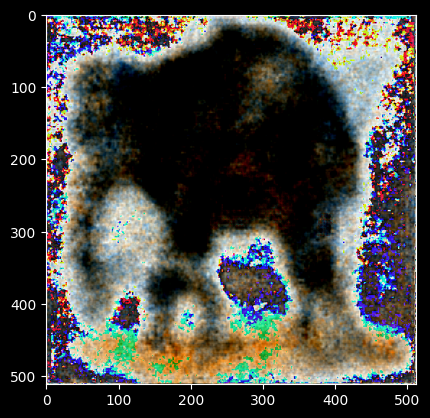

In [38]:
_, axis = plt.subplots()
axis.imshow(np.asarray(to_pil_image(decoding[0])))
plt.show()

In [39]:
with imgio.get_writer(f"test_{SESSION_NUM}.gif", mode="I", duration=0.5) as writer:
    for _ in range(SAMPLES_TO_GENERATE):

        walk += th.normal(0.12, 0.12, (1, ENCODING_DIM))
        gen_sample = model.decode(walk)
        img = np.asarray(to_pil_image(gen_sample[0]))
        writer.append_data(img)

writer.close()
SESSION_NUM += 1